# PSO - ALOCAÇÃO DE TEMPO PARA CURSO DE EXTENSÃO


Problema a ser resolvido: Um curso de extensão (13h) será ministrado segunda, terça e quarta em um determinado mês em um ano.

3 turmas se interessaram, mas os horários não batem.

O algoritmo deve analisar 6 horários diferentes (seg, ter e qua de manhã e de tarde) e aumentar o aproveitamento das 3 turmas em relação ao curso.

Otimizar o calendário do curso para que as 3 turmas vejam o máximo possível do curso.

Esse tipo de algoritmo é baseado no comportamento coletivo de animais.

Aplicações: simulação do comportamento social de animais, problemas científicos de engenharia e otimização de funções matemáticas.

Devido à inércia, o animal irá mudar aos poucos a sua direção. 

O algoritmo irá fazer as partículas se aproximarem cada vez mais da solução do problema ao sempre seguir o indivíduo mais bem adequado para cada momento.

Supondo uma sala com uma fonte de calor e várias pessoas, se as pessoas se moverem em direção à pessoa mais próxima à fonte, a pessoa mais próxima da fonte de calor pode passar a ser outra pessoa. Assim o algoritmo vai convergindo até a melhor resposta.

Inércia faz o espaço de soluções percorrido ser maior.

No caso do problema do curso, a fonte de calor seria o curso conseguir um aproveitamento de 39h de aula juntando as 3 turmas. 

A partícula que se aproximar disso é a melhor solução.

![](enxame.jpg)

![](inercia.jpg)

1 - Inicializar a população.

2 - Avaliar o fitness.

3 - Comparar o valor de cada partícula com seus valores anteriores.

4 - Comparar o valor de todas as partículas para achar o melhor.

5 - Atualizar a posição e velocidade de cada partícula.

6 - Loop para o passo 2 até chegar no critério de parada.

Hiperparâmetros:

- Inércia(w) = Importância da partícula continuar na direção que está.

- c1 = coeficiente cognitivo. Ao aumentar, valoriza mais as posições e velocidades de uma mesma partícula do que da melhor partícula ou do todo.

- c2 = coeficiente social. Ao aumentar, valoriza mais a melhor posição encontrada no enxame.

Cada partícula é um vetor composto pela posição anterior, pela posição atual e a velocidade.

As posições são vetores que mudam com a dimensionalidade do problema.

![](alg.jpg)

![](calc.jpg)

![](vet.jpg)

Função objetiva deve analisar o aproveitamento das 3 turmas e otimizar issso.

Aproveitamento total = (aprov1 + aprov2 + aprov3)/39

39 = 3 * 13


Cada posição de uma partícula é um vetor de 6 dimensões.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

w = 0.7
c1 = 0.7
c2 = 0.7

Criando partícula

In [2]:
def particula():
  while True:
    particula = []
    pos1 = []
    pos2 = []
    for i in range(6):
      rand = random.randint(0,3) + random.random() # O maior espaço de tempo disponível por uma turma é 4h em um dos horários
      rand2 = random.randint(0,3) + random.random()
      pos1.append(rand)
      pos2.append(rand2)
    vel = [0,0,0,0,0,0]
    particula.append(pos1)
    particula.append(pos2)
    particula.append(vel)
    if sum(particula[0]) <= 13 and sum(particula[1]) <=13:
      return particula
    

In [3]:
particula()

[[1.198463277826343,
  1.58661318274454,
  3.665503686844062,
  2.1744572933586372,
  0.6529382915296444,
  3.714465360258754],
 [0.08704671519494367,
  2.434392706326874,
  1.3193340320062508,
  0.14764168637846098,
  0.3644432480937616,
  1.982126230587947],
 [0, 0, 0, 0, 0, 0]]

Criando população

In [4]:
def populacao(quant):
  particulas = []
  for i in range(quant):
    particulas.append(particula())
  return particulas

In [5]:
pop = populacao(20)

print(pop[0])
print(pop[2])
print(len(pop))

[[3.2093783925984254, 0.5077379309418127, 2.051152043453901, 1.287802189887479, 1.0727248310014477, 1.4839028894410515], [1.3571583238201463, 0.05375548411575182, 0.7903986376976221, 1.8726071135803666, 2.7797479670286984, 2.4531462099878913], [0, 0, 0, 0, 0, 0]]
[[0.668213796093543, 0.42668646479208494, 1.0999876735158995, 2.35677183755946, 0.5326814667856224, 2.3784224206494304], [0.15514543337338493, 3.0989261567564625, 2.206576061193248, 0.6517168967118147, 1.6100445065976794, 2.9252720855246155], [0, 0, 0, 0, 0, 0]]
20


FUNÇÃO FITNESS

In [6]:
def avalia(particula,indice):
  turma1 = [3,2,1,2,4,2.5]
  turma2 = [1,4,0,2,4,1.5]
  turma3 = [1.5,2.5,1,2,3.5,1.5]
  turmas = [turma1,turma2,turma3]
  if sum(particula[indice]) <= 13:
    soma = 0
    for turma in turmas:
      cont = 0
      while cont < len(particula[indice]):
        dupla = [particula[indice][cont],turma[cont]]
        minimo = min(dupla)
        soma += minimo
        cont += 1
    return soma/39
  else:
    return 0.01 # Nota ruim para partículas que passam de 13 horas

In [7]:
p = particula()
print(p[0])
print(p[1])

[1.7839936085830663, 1.139498508758673, 0.7931884244731218, 3.9902470876795264, 0.4748131331248301, 3.0958218402746733]
[1.468610709870561, 1.2667145569719582, 2.4949309818940506, 2.731978460575607, 1.9634901267995652, 2.894930578855812]


In [8]:
avalia(p,1)

0.6955855248988639

FUNÇÃO DA MELHOR POSIÇÃO INDIVIDUAL DA PARTÍCULA

In [9]:
def pbest(particula):
  valores = []
  cont = 0
  while cont < 2:
    if cont == 0:
      melhor = particula[0]
    elif cont == 1:
      if avalia(particula,cont) > avalia(particula,0):
        melhor = particula[1]
    cont += 1
  return melhor

In [10]:
p = particula()
print(p[0])
print(avalia(p,0))
print()
print(p[1])
print(avalia(p,1))

[0.3997648836130331, 1.5536483330120063, 1.519278523488342, 3.476916410445546, 1.5524809438352274, 1.76924192512667]
0.5971006258078838

[3.946441283484445, 0.641827023441556, 1.7394795457700696, 0.2776872533231749, 1.527043178193633, 3.0440126759093022]
0.5215300606378229


In [11]:
pbest(p)

[0.3997648836130331,
 1.5536483330120063,
 1.519278523488342,
 3.476916410445546,
 1.5524809438352274,
 1.76924192512667]

MELHOR GLOBAL (GBEST)

In [12]:
def avalia_simples(part): # Serve para avaliar uma posição específica de uma partícula
  turma1 = [3,2,1,2,4,2.5]
  turma2 = [1,4,0,2,4,1.5]
  turma3 = [1.5,2.5,1,2,3.5,1.5]
  turmas = [turma1,turma2,turma3]
  if sum(part) <= 13:
    soma = 0
    for turma in turmas:
      cont = 0
      while cont < len(part):
        dupla = [part[cont],turma[cont]]
        minimo = min(dupla)
        soma += minimo
        cont += 1
    return soma/39
  else:
    return 0.01

def gbest(populacao_gerada): # Serve para achar a melhor posição global
  pbests = []
  for i in populacao_gerada:
    pbests.append(list(pbest(i))) # Melhores posições de cada partícula
  
  for indice in pbests:
    if pbests.index(indice) == 0: # Primeira posição
      gbest = pbests[0]
    else:
      if avalia_simples(indice) > avalia_simples(gbest):
        gbest = indice # Selecionando o melhor valor global dos melhores valores individuais de cada partícula 
  return gbest

In [13]:
pop = populacao(20)
melhor = gbest(pop)
print(melhor)
print(avalia_simples(melhor))

[1.0798973235021847, 2.634989177859449, 2.025240123675379, 0.36750376749851377, 3.624243969171931, 2.1839389652941974]
0.7520441546409594


In [14]:
sum(melhor)

11.915813327001654

ATUALIZAÇÃO DA VELOCIDADE DA PARTÍCULA

In [15]:
def nova_velocidade(part,pop):
  r1 = random.random()
  r2 = random.random()
  vel = part[2] 
  nova_v = w*np.array(vel) + c1*r1*(np.array(pbest(part))-np.array(part[1])) + c2*r2*(np.array(gbest(pop))-np.array(part[1]))
  return nova_v

In [16]:
pop = populacao(20)
p = pop[0]
vel = p[2]
nova_vel = nova_velocidade(p,pop)
print(p)
print(vel)
print(nova_vel)

[[3.695510521868642, 1.1474291921755524, 0.6750230957817686, 0.5993334128716447, 1.70936807077579, 2.7738922089230416], [0.5156142379903568, 3.602879171053975, 0.9208467471245666, 0.582383247570408, 0.21293014149818912, 2.176382781426106], [0, 0, 0, 0, 0, 0]]
[0, 0, 0, 0, 0, 0]
[ 1.30539555 -1.36231408  0.56969319  0.88875189  1.98639459 -0.3300699 ]


Nova posição e nova partícula

In [17]:
def nova_posicao(p,pop):
  nvel = nova_velocidade(p,pop)
  nova = p[1] + nvel
  return nova


#### IMPORTANTE
# SE UMA NOVA POSIÇÃO DE UMA PARTÍCULA TIVER SOMA MAIOR QUE 13, A AVALIAÇÃO DESSA POSIÇÃO SERÁ 0.01, O QUE É BEM RUIM
# ASSIM, ESSA POSIÇÃO NÃO SERÁ pbest E MUITO MENOS gbest, ENTÃO LOGO SERÁ DESCARTADA. 
# ISSO É O QUE GARANTE QUE AS PARTÍCULAS IRÃO EVOLUIR, MAS AS MELHORES NUNCA SERÃO AS QUE PASSAM DE 13 HORAS.


def nova_particula(p,pop):
  nova_p = [pbest(p),nova_posicao(p,pop),nova_velocidade(p,pop)]
  # A melhor posição antes se torna a posição anterior. 
  # Isso elimina a possibilidade de se perder uma boa posição por ficar com uma posição aleatória de início ruim
  return nova_p

In [18]:
pop1 = populacao(20)
p1 = pop1[0]
nova_part = nova_particula(p1,pop1)

print(p1)
print()
print(nova_part)

[[0.6585802556865107, 3.267820863378469, 0.6613222030505712, 1.5461007922268617, 0.6921746976069717, 1.7161914503602285], [0.6693223332744932, 2.98642363228471, 0.910066865385298, 0.7189005425898358, 2.580303632232247, 3.4611506182314518], [0, 0, 0, 0, 0, 0]]

[[0.6693223332744932, 2.98642363228471, 0.910066865385298, 0.7189005425898358, 2.580303632232247, 3.4611506182314518], array([0.890231  , 2.88015889, 1.11586603, 1.06412773, 2.70537647,
       2.93111736]), array([ 0.64982636, -0.31258906,  0.60538015,  1.01552253,  0.36791508,
       -1.55914929])]


### EXECUÇÃO DO ALGORITMO

[3.494664545082785, 2.8569036029252874, 0.03429413418602856, 1.6675468897304375, 3.1751376597514804, 0.7294496818902584]
0.7600485786003558
11.957996513566277

[2.6480307830253165, 1.9994919583371533, 0.6400731664440769, 1.9904384243876452, 2.8027967772567304, 1.439915700501873]
0.7981052742913762
11.520746809952794

[2.6480307830253165, 1.9994919583371533, 0.6400731664440769, 1.9904384243876452, 2.8027967772567304, 1.439915700501873]
0.7981052742913762
11.520746809952794

[3.0574203521659284, 2.5785325214684978, 0.22575900948221606, 1.995907820715864, 2.7212909858014083, 1.4332567067480007]
0.8072158225699679
12.012167396381916

[3.440160159818003, 2.7324695614736183, 0.024767141638889656, 2.5070372902808917, 2.9798663539725427, 1.270842655019239]
0.8085674582494037
12.955143162203184

[3.102893412444619, 2.34752951477575, 0.09410382438918102, 2.5798809030087213, 3.379104595350748, 1.4553882357431065]
0.8432498761951647
12.958900485712125

[2.86680668928325, 2.0780714820872417, 0.1426

Text(0.5, 1.0, 'Aproveitamento do curso (%)')

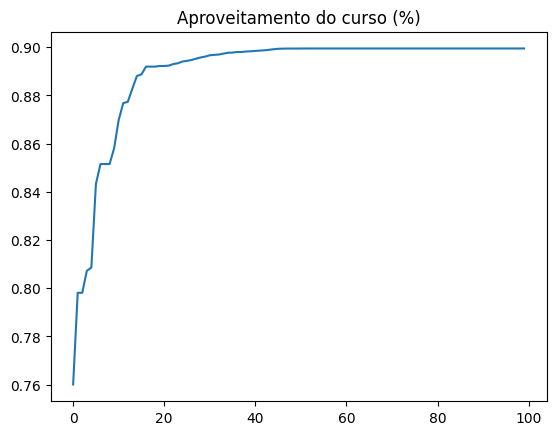

In [19]:
population = populacao(20)
valores = []
grafico = []

for i in range(100): # Gerações
  melhor = gbest(population) # Melhor posição global (vetor com 6 dimensões)
  novaPop = []
  for j in population:
    nova_part = nova_particula(j,population)
    novaPop.append(nova_part)
  population = novaPop
  grafico.append(avalia_simples(melhor))
  print(melhor)
  print(avalia_simples(melhor))
  print(sum(melhor))
  print()

plt.plot(grafico)
plt.title('Aproveitamento do curso (%)')
